# Assignment 3 (Maksim Kaledin)

## Problem 1

Let $G(V,E)$ be a complete directed weighted graph with tiles as vertices $V$, and euclidean distances between tiles $i,j$ as weights $c_{ij}$. Denote by $\delta^+(v)$ all input edges and by $\delta^-(v)$ all output edges. Consider $f(e)\geq 0$ to be a flow through the edge $e$, $f(i,j)$ (in shorter notation, $f_{ij}$) corresponds to amount of ground transferred from tile $i$ to $j$. We also need to define demands and supplies $b_i=g'_i-g_i$ for each tile $i$, where $g_i$ is the current amount of ground at $i$ and $g'_i$ is the goal one. Negative $b_i$ note that there it too much ground while the positive ones show the demand for additional ground. Summing up, we have the following $LP$ problem.

$$\text{min}_{f_{ij}} \sum_{i\neq j}f_{ij},~ s.t.$$

$$\sum_{e \in \delta^+(i)}f(e) - \sum_{e \in \delta^-(i)}f(e) = b_i \quad \forall i\in V.$$

all constraints could be expressed easily since $G$ is a complete graph.

In [1]:
import cvxpy as cv
import numpy as np
import scipy as sp

n=20 # number of tiles

#tile positions
tiles=np.zeros((2,n*(n-1)))
for i in np.arange(4):
    for j in np.arange(5):
        tiles[0][i*5+j]=j
        tiles[1][i*5+j]=i

costs=np.array([sp.linalg.norm(tiles[:,j]-tiles[:,i],2) for j in np.arange(n) for i in np.arange(n) if not(j==i) ])


#demands
b=np.array([1,1,-4,-4,-4,
            1,1,-4,-14,-4,
            6,1,1,-4,1,
            6,6,6,1,6])

#constraints
A=np.zeros((n,n*(n-1)))

               
for i in np.arange(n):
    A[i,i*(n-1):(i+1)*(n-1)]=-1 # input edges

    if(i>0):
        A[i,np.array([k*(n-1)+i-1 for k in np.arange(i)])]=1 #for k<i
    
    if(i+1<n):
        A[i,np.array([k*(n-1)+i for k in np.arange(i+1,n)])]=1 #for k>i

print(A[:,:15])#just check if it is correctly generated

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [2]:
#CVX model
#variables
f = cv.Variable(n*(n-1))
#sequentially f_i1,...,f_ij,...,f_in with i != any of j

flowConstraints = [A*f == b, f>=0]
flowObj = cv.Minimize(costs*f)

flowProblem = cv.Problem(flowObj,flowConstraints)
flowProblem.solve(solver="GUROBI")

print ("status:",flowProblem.status)
print ("optimal value", flowProblem.value)
#print ("optimal var", f.value.reshape((n,n-1)))
res=f.value.reshape((n,n-1))


for i in np.arange(n):
    
    for el in [j for j in np.arange(n-1) if res[i,j]>0]:
        if(i<el):
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str((el-1) % 5)+","+str((el-1) // 5)+")"+": "+str(res[i,el]))
        else:
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str(el % 5)+","+str(el // 5)+")"+": "+str(res[i,el]))


status: optimal
optimal value 95.49106383667822
move from (1,0) to (0,0): 1.0
move from (2,0) to (1,0): 2.0
move from (2,0) to (3,0): 1.0
move from (2,0) to (4,0): 1.0
move from (3,0) to (3,1): 4.0
move from (4,0) to (1,3): 1.0
move from (4,0) to (2,3): 3.0
move from (2,1) to (3,1): 2.0
move from (2,1) to (4,1): 1.0
move from (2,1) to (3,2): 1.0
move from (3,1) to (0,2): 7.0
move from (3,1) to (3,2): 5.0
move from (3,1) to (0,3): 2.0
move from (4,1) to (2,2): 4.0
move from (2,2) to (4,2): 6.0
move from (3,2) to (0,3): 4.0
move from (4,2) to (2,3): 3.0


Note that Gurobi returned an integer solution. However there are fractional, according to CVX, even if we consider 1e-10 equals zero due to float point errors.

In [3]:
#CVX model
#variables
f = cv.Variable(n*(n-1))
#sequentially f_i1,...,f_ij,...,f_in with i != any of j

flowConstraints = [A*f == b, f>=0]
flowObj = cv.Minimize(costs*f)

flowProblem = cv.Problem(flowObj,flowConstraints)
flowProblem.solve()

print ("status:",flowProblem.status)
print ("optimal value", flowProblem.value)
#print ("optimal var", f.value.reshape((n,n-1)))
res=f.value.reshape((n,n-1))


for i in np.arange(n):
    
    for el in [j for j in np.arange(n-1) if res[i,j]>0]:
        if(i<el):
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str((el-1) % 5)+","+str((el-1) // 5)+")"+": "+str(res[i,el]))
        else:
            print("move from "+"("+str(i % 5)+","+str(i // 5)+")"+" to "+"("+str(el % 5)+","+str(el // 5)+")"+": "+str(res[i,el]))


status: optimal
optimal value 95.4910638297555
move from (0,0) to (0,0): 2.08110600224e-11
move from (0,0) to (3,0): 1.81793079316e-10
move from (0,0) to (4,0): 1.95782968581e-11
move from (0,0) to (3,1): 9.0965702718e-11
move from (0,0) to (4,1): 6.00977727133e-12
move from (0,0) to (3,2): 4.45700990122e-11
move from (1,0) to (0,0): 0.532171543474
move from (1,0) to (1,0): 1.72445090092e-11
move from (1,0) to (3,0): 9.19387883737e-10
move from (1,0) to (4,0): 2.57596393401e-10
move from (1,0) to (0,1): 2.3491179658e-11
move from (1,0) to (3,1): 3.60445804567e-10
move from (1,0) to (4,1): 1.08317101262e-10
move from (1,0) to (0,2): 1.44558748348e-11
move from (1,0) to (3,2): 1.72158797332e-10
move from (1,0) to (4,2): 6.16516944325e-11
move from (1,0) to (0,3): 1.05373463301e-11
move from (2,0) to (0,0): 0.467828454981
move from (2,0) to (1,0): 1.53217154407
move from (2,0) to (2,0): 3.02184683988e-11
move from (2,0) to (3,0): 0.999999995756
move from (2,0) to (4,0): 0.999999991822
mov

## Problem 2

Suppose we need to solve a problem $(C,V)$, where $C$ are constraints and $v$ are variables. Implement the following recursive procedure. 

### Function Solve
1. Initialize $bestGoal=-inf$
2. Solve pure LP $(\hat{V_0}, goal)=LPSolve(C,V)$ with the given goal function.

    2.1 If $V_0$ is integer, then return $(\hat{V_0}, goal)$

3. Otherwise, denote by $\tilde{V}$ the set of fractional variables from $V_0$ which correspond to open/close warehouse.

4. For each $\tilde{v}\in \tilde{V}$ perform the following steps
    
    4.2 $res_0=Solve(C+\left\lbrace \tilde{v}==0\right\rbrace,V)$      
    
    4.3 $res_1=Solve(C+\left\lbrace \tilde{v}==1\right\rbrace,V)$
    
    4.4 Choose the best of them as (resSol,resGoal) 
    
    4.5 If $bestGoal==inf$, then (bestSolution,bestGoal)=(resSol,resGoal)
    
    4.6 Otherwise check if obtained solution is better

5. return (bestSol,bestGoal)

(200,)
status: optimal
optimal value 141.40119917473294
28.3897815292 29.4845206387


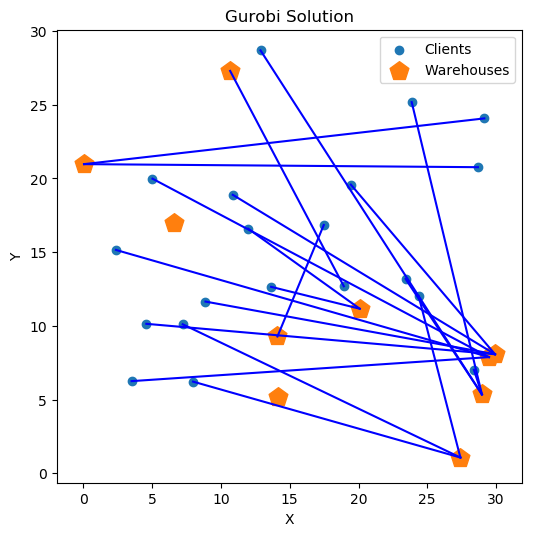

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

def PlotSolution(assignmentMatrix,clients,warehouses,title,figsizze=(6,6)):
    f, ax = plt.subplots(figsize=figsizze)
    ax.scatter(clients[0,:],clients[1,:],label='Clients')
    ax.scatter(warehouses[0,:],warehouses[1,:],marker=(5,0),s=200,label='Warehouses')
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(title)
    print(clients[0,1],warehouses[0,1])
    for i in np.arange(clients.shape[1]):
        for j in np.arange(warehouses.shape[1]):
            if(np.abs(assignmentMatrix[i,j]-1)<1e-8):
                ax.plot(np.array([clients[0,i],warehouses[0,j]]),np.array([clients[1,i],warehouses[1,j]]),color='blue')

import scipy as sp

F = 10 #Warehouses
C = 20 # Clients
capacities = np.random.randint(np.round(np.ceil(C/F)+1),2*np.round(np.ceil(C/F)+1),F)

clientLocations = np.random.uniform(0,30,(2,C))
warehouseLocations = np.random.uniform(0,30,(2,F))
opCosts = np.random.uniform(0,5,F)

distances = np.array([np.linalg.norm(clientLocations[:,i]-warehouseLocations[:,j],2) for j in np.arange(F) for i in np.arange(C)])
print(distances.shape)

WLVars = cv.Int(C*F+F) 


#constraints
A=np.zeros((C,C*F+F)) #client constraints
B=np.zeros((F,C*F+F)) #warehouses constraints

for i in np.arange(C):
    A[i,F*i+np.arange(F)]=1

for i in np.arange(F):
    B[i,i+np.arange(0,F*C,F)]=1
    B[i,F*C+i]=-capacities[i]
    
#sequentially f_i1,...,f_ij,...,f_in with i != any of j

constr = [A*WLVars ==1, B*WLVars <= 0, WLVars>=0, WLVars<=1]
obj = cv.Minimize(np.block([distances,opCosts.reshape(1,F)])*WLVars)

WHProblem = cv.Problem(obj,constr)
WHProblem.solve(solver="GUROBI")

print ("status:",WHProblem.status)
print ("optimal value", WHProblem.value)
#print ("optimal var", f.value.reshape((n,n-1)))
res=WLVars.value[:C*F].reshape((C,F))
PlotSolution(res,clientLocations,warehouseLocations,"Gurobi Solution")



Now let's implement B&B algorithm with cvx LP-Solver.

In [243]:
import numpy as np



def Solve(cA,cB,addConstr,cost,C,F,veryBestGoal=np.inf,veryBestSolution=None):
    eps=1e-6
    
    
    
    WHVars = cv.Variable(C*F+F) #for init purposes
    constrs=[cA*WHVars==1,cB*WHVars<=0]
    obj= cv.Minimize(cost*WHVars)
    
    constrs= constrs + [WHVars<=1, WHVars>=0]
    
    if(addConstr is not None):
        print(addConstr)
        eqConstrs = []
        addConstrsVals=[]
        zz=np.zeros((C*F+F,C*F+F))
        rp = np.zeros((C*F+F,1))
        for constraint in addConstr:
            constrs = constrs +[WHVars[constraint[0]]==constraint[1]]
            zz[constraint[0],constraint[0]]=1
            rp[constraint[0]]=constraint[1]
            
        
        
        constrs = constrs + [zz*WHVars==rp]
        
    
       
    #print(np.array(set(np.arange(C*F+F))-eqConstrs))
    lpProblem = cv.Problem(obj,constrs)
    lpProblem.solve()
    
    print(lpProblem.status)
    if(not lpProblem.status=="optimal"):
        return None
    
    if(lpProblem.value>veryBestGoal):
        return None
    
    #print(lpProblem.status)
    
    fracVars=[]
    for v in np.arange(C*F,WHVars.size[0]):
        #print("FRACTEST:",WHVars[v].value-np.round(WHVars[v].value))
        if(not (WHVars[v].value-np.round(WHVars[v].value)<=eps)):
            #print("TRUE")
            fracVars.append(v)
            
    #print(fracVars)
    if(len(fracVars)==0):#the solution is integer
       
        return (WHVars,lpProblem.value)
        
    
    bestSol = None #bestSolution initialization
    
    for v in fracVars:
        if(addConstr is None):
            res0= Solve(cA,cB,[[v,0]],cost,C,F,veryBestGoal,veryBestSolution)    
            if(res0 is not None):
                (goal0,sol0)=res0
                res1= Solve(cA,cB,[[v,1]],cost,C,F,goal0,sol0)
            else:
                res1= Solve(cA,cB,[[v,1]],cost,C,F,veryBestGoal,veryBestSolution)
        else:
            res0= Solve(cA,cB,addConstr+[[v,0]],cost,C,F,veryBestGoal,veryBestSolution)    
            if(res0 is not None):
                (goal0,sol0)=res0
                res1= Solve(cA,cB,addConstr+[[v,1]],cost,C,F,goal0,sol0)
            else:
                res1= Solve(cA,cB,addConstr+[[v,1]],cost,C,F,veryBestGoal,veryBestSolution)
        
            
        if(res0 is not None):
            (goal0,sol0)=res0
            
            if(res1 is not None):
                (goal1,sol1)=res1
                
                if(goal0<goal1):#for goal0<goal
                    if(veryBestGoal>goal0):
                        veryBestGoal=goal0
                        veryBestSolution=sol0
            
                else:#same for goal1<goal0
                    if(veryBestGoal>goal1):
                        veryBestGoal=goal1
                        veryBestSolution=sol1
            else:
                #res1None res0Not
                if(veryBestGoal>goal0):
                        veryBestGoal=goal0
                        veryBestSolution=sol0
                
        else:
            if(res1 is not None): #res1Not res0None
                (goal1,sol1)=res1
                if(veryBestGoal>goal1):
                        veryBestGoal=goal1
                        veryBestSolution=sol1
                        

    #print("OUT3Level",level)
    #print(list(bestSol)[1])
    return (veryBestGoal,veryBestSolution)

In [244]:
WLVars_0 = cv.Variable(C*F+F) 
costVector = np.block([distances,opCosts.reshape(1,F)])

res=Solve(A,B,None,costVector,C,F)
if(res is None):
    print("None...")
else:
    (varss,goal)=res

optimal
[[200, 0]]
optimal
[[200, 0], [203, 0]]
optimal
[[200, 0], [203, 0], [204, 0]]
optimal
[[200, 0], [203, 0], [204, 1]]
optimal


Exception: Cannot evaluate the truth value of a constraint or chain constraints, e.g., 1 >= x >= 0.

After several attempts to fight with this error I haven't come up with a solution.

28.3897815292 29.4845206387
28.3897815292 29.4845206387


TypeError: tuple indices must be integers or slices, not tuple

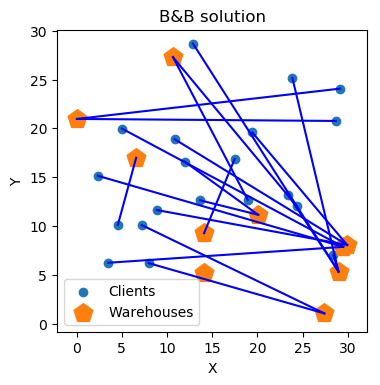

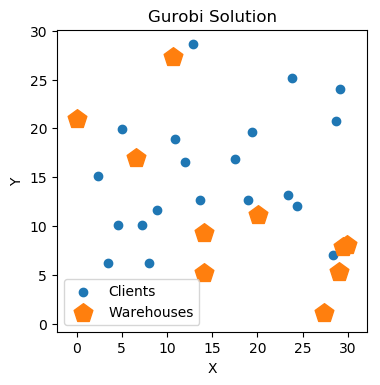

In [167]:
PlotSolution(varss.value[:C*F].reshape(C,F),clientLocations,warehouseLocations,'B&B solution',(4,4))
PlotSolution(res,clientLocations,warehouseLocations,"Gurobi Solution",(4,4))

## Problem 3

Let $x_{ij}$ be the binary variable which equals $1$, if student $i$ is assigned to room together with student $j$ for $i,j=1,..,20$ (considering $i<j$). Denote by $p_{ij}$ the (symmetric) preference matrix. The corresponding ILP problem can be formulated as

$$
\max_{x_{ij}} \sum_{i < j}p_{ij}x_{ij},~ s.t.
$$
$$
\sum_{i=2,..,20}\sum_{j < i} x_{ij} \leq 10,
$$
$$
\sum_{j<i}x_{ij} + \sum_{j>i}x_{ji} = 1 \quad \forall i=1,..,20.
$$



In [ ]:
import gurobipy as grb
n=20#students
m=10#rooms

#preferences
prefs_matrix=np.random.uniform(0,1,(n,n))
prefs=dict([((i,j),prefs_matrix[i,j]) for i in np.arange(1,n) for j in np.arange(i) ])

#model definition
model=grb.Model("Assignment")
indexes=[(i,j) for i in np.arange(1,n) for j in np.arange(i)]

#variables
xij= model.addVars(indexes,vtype=grb.GRB.BINARY)

model.setObjective(xij.prod(prefs),grb.GRB.MAXIMIZE)

model.addConstr(xij.sum(),grb.GRB.LESS_EQUAL, m, "rooms")

for i in np.arange(1,n):
    expr = grb.LinExpr(np.array(np.ones(i)), [xij[i,j] for j in np.arange(i)])
    expr.addTerms(np.array(np.ones(n-1-i)), [xij[j,i] for j in np.arange(i+1,n)])
    model.addConstr(expr,grb.GRB.EQUAL,1)

model.optimize()
#np.array([xij[i,j].x for i in np.arange(1,n) for j in np.arange(i)])
for el in indexes:
    el_lst=list(el)
    if(not(xij[el_lst[0],el_lst[1]].x==0)):
        print(el,xij[el_lst[0],el_lst[1]].x)

Consider LP-relaxation and draw the graph with corresponding adjacency matrix.

In [ ]:
#CVX solution

#preferences
prefs_cv=np.array([prefs_matrix[i,j] for i in np.arange(1,n) for j in np.arange(i) ])

#variables
xij_cv=cv.Variable(n*(n-1)//2)
indexes=[(i,j) for i in np.arange(1,n) for j in np.arange(i)]

#constraint matrix
A=np.zeros((n,n*(n-1)//2)) #n-1 for 1neighbour constraint + 1 for m rooms
A[0,:]=1#<=m rooms
start=0 # for indexing purposes
print(A.shape)
for i in np.arange(-1,n-1):
    if(i>=0):
        print('row',start+np.arange(i+1))
        A[i+1,start+np.arange(i)]=1 #row sum up to diagonal
    if(i<n-2):
        print('col',[np.sum(np.arange(j+2))-(j-i) for j in np.arange(i+1,n-1)])
        A[i+1,np.array([np.sum(np.arange(j+2))-(j-i) for j in np.arange(i+1,n-1)])]=1 #col sum up to diagonal
   
    start=start+i+1
    



In [ ]:
#CVX model

cv_right=np.ones((n,1)) #right part
cv_right[0]=m

problem_cv=cv.Problem(cv.Maximize(prefs_cv*xij_cv),
                      [A*xij_cv == cv_right,
                       xij_cv <=1,
                       xij_cv >=0])

problem_cv.solve()

print ("status:",problem_cv.status)
print ("optimal value", problem_cv.value)



In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

adj_mat= np.zeros((n,n))
for i in np.arange(1,n):
    print(np.sum(i)+np.arange(i))
    adj_mat[i,:i]=(xij_cv.value[np.sum(i)+np.arange(i)]).transpose()
    
G=nx.from_numpy_matrix(adj_mat)
nx.draw(G)#no any information
nx.write_gml(G, "test.gml")

In [ ]:
## OTHER APPROACH
n=6 # 5 students


prefs2_matrix = np.random.uniform(0,1,size=(n,n))
prefs2_matrix = (prefs2_matrix+prefs2_matrix.T)/2
prefs2_matrix = prefs2_matrix - 10000*np.eye(n)
zij = cv.Variable(n*n)
A=np.zeros((2*n+n*(n-1)//2,n*n))

for i in np.arange(n):
    A[i,n*i+np.arange(n)]=1
    A[n+i,i+np.arange(0,n*n,n)]=1

kk=0
for i in np.arange(1,n):
    for j in np.arange(i):
        A[2*n+kk,i*n+j]=1
        A[2*n+kk,j*n+i]=-1
        kk=kk+1

f= np.zeros((n*(n-1)//2+2*n,1))
f[np.arange(2*n)]=1

probl = cv.Problem(cv.Maximize(np.array(prefs2_matrix.reshape(n*n,1)[:,0])*zij), [A*zij == f, zij>=0, zij<=1])

probl.solve()

print("status ",probl.status)
print ("optimal value ", probl.value)
print(zij.value.reshape(n,n))

In [ ]:
G=nx.from_numpy_matrix(zij.value.reshape(n,n))
nx.draw(G)
